### Community Structure and Network Analysis of Chat Data in Python

In [157]:
# Importing the required modules
from community import community_louvain
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import community
import matplotlib
import matplotlib.pylab as pl
import matplotlib.gridspec as gridspec
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
from collections import Counter

Total number of Edges= 91
Total number of Nodes= 130


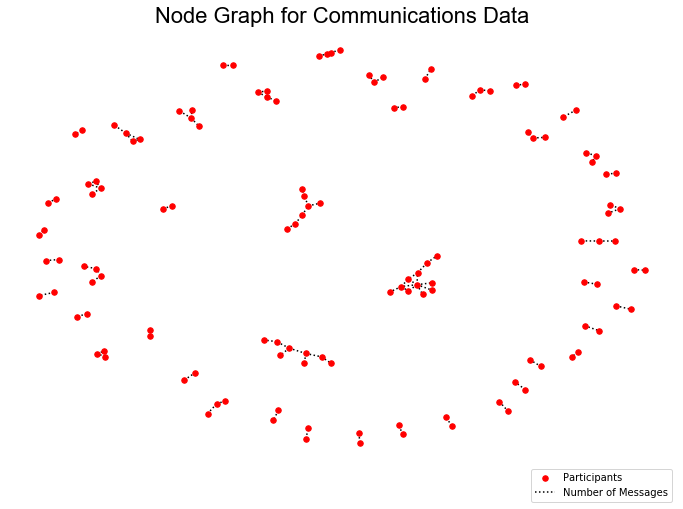

In [158]:
# Figure Dimensions
value_height=9
value_width=16
matplotlib.rcParams['figure.figsize']=[12, 8]

# Reading in the data for the Inviters and Invitees from the the Bloomberg Chat Data
df = pd.read_excel('/Users/rohandeshmukh/Desktop/dataset.xlsx', index_col=0)

# Creating a graph from a pandas dataframe
G = nx.from_pandas_edgelist(df, 'Inviter', 'Invitee', 'MsgCount')
for index, row in df.iterrows():
    G.add_edge(row['Inviter'], row['Invitee'])
    
# Position nodes using Fruchterman-Reingold force-directed algorithm
pos = nx.spring_layout(G)
# Drawing the graph
nx.draw_networkx_nodes(G, pos, with_labels=True, node_size=30,font_size=7,node_color='red', label='Participants')
nx.draw_networkx_edges(G, pos, with_labels=False, style='dotted',width=1.5,label='Number of Messages')
plt.title('Node Graph for Communications Data', fontsize=22, fontname='Arial')
plt.box(on=None)
plt.axis('off')
plt.legend(bbox_to_anchor=(1, 0), loc='best', ncol=1)
plt.savefig('base.png', dpi=400)

# Additional metrics
print("Total number of Edges=", len(G.edges()))
print("Total number of Nodes=", len(G.nodes()))

In [159]:
df.head()

,Inviter,Invitee,MsgCount
Num,,,
1,P1,P63,180
2,P2,P64,135
3,P3,P65,88
4,P4,P66,82
5,P5,P67,67


In [160]:
# Centrality Metrics

# Calculating Centrality metrics for the Graph

dict_degree_centrality = nx.degree_centrality(G)
dict_closeness_centrality = nx.closeness_centrality(G)
dict_eigenvector_centrality = nx.eigenvector_centrality(G)

# Top 10 nodes with the largest values of degree centrality in descending order
dict(Counter(dict_degree_centrality).most_common(10))

{'P1': 0.05426356589147287,
 'P63': 0.031007751937984496,
 'P6': 0.023255813953488372,
 'P12': 0.023255813953488372,
 'P16': 0.023255813953488372,
 'P27': 0.023255813953488372,
 'P29': 0.023255813953488372,
 'P31': 0.023255813953488372,
 'P34': 0.023255813953488372,
 'P51': 0.023255813953488372}

In [161]:
# Top 10 nodes with the largest values of closeness centrality in descending order
dict(Counter(dict_closeness_centrality).most_common(10))

{'P1': 0.05537098560354374,
 'P12': 0.04306632213608958,
 'P16': 0.04306632213608958,
 'P63': 0.04079967360261118,
 'P44': 0.03691399040236249,
 'P78': 0.033704078193461405,
 'P88': 0.033704078193461405,
 'P92': 0.033704078193461405,
 'P29': 0.03165374677002584,
 'P51': 0.03165374677002584}

In [162]:
# Top 10 nodes with the largest values of eigenvector centrality in descending order
dict(Counter(dict_eigenvector_centrality).most_common(10))

{'P1': 0.5883841459330807,
 'P63': 0.4214731212259469,
 'P16': 0.39833011493003845,
 'P12': 0.3260306212406696,
 'P44': 0.3011155082045361,
 'P78': 0.1754422105913788,
 'P88': 0.1754422105913788,
 'P92': 0.1754422105913788,
 'P129': 0.12567329761315726,
 'P36': 0.10670132764473339}

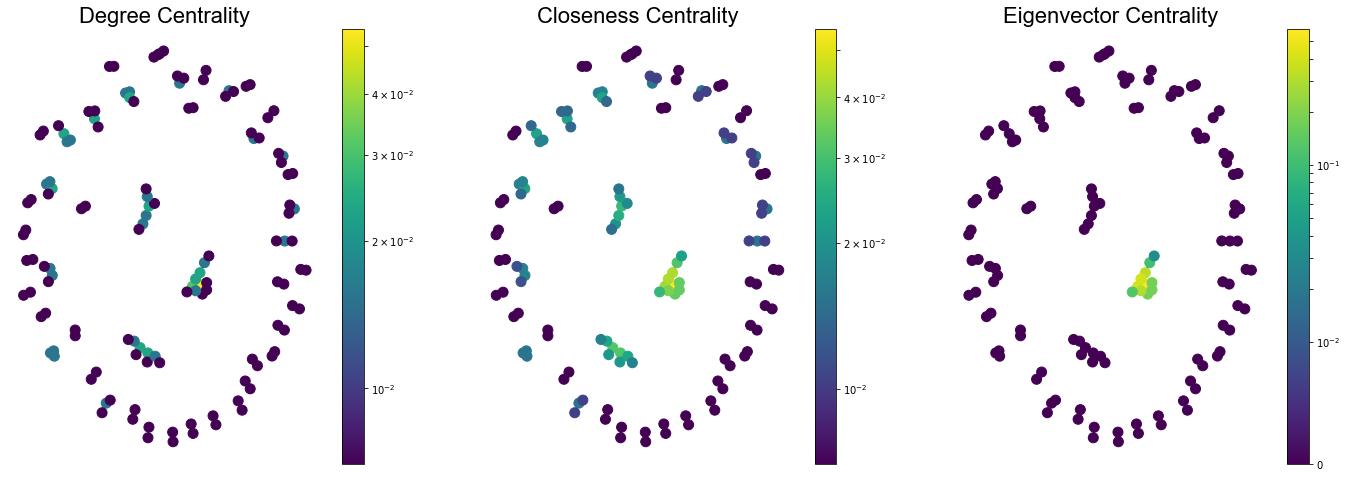

In [163]:
# Function to plot the graphs for each centrality metric
matplotlib.rcParams['figure.figsize']= [24, 8]
def draw(G, pos, lista, listb, measure_name):
    nodes=nx.draw_networkx_nodes(G, pos, node_size=100, cmap=plt.cm.viridis,node_color=lista,nodelist=listb)
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1))
    edges=nx.draw_networkx_edges(G, pos)
    plt.title(measure_name, fontsize=22, fontname='Arial')
    plt.colorbar(nodes)
    plt.axis('off')

plt.subplot(1,3,1)
list_pos_values = []
for i in nx.degree_centrality(G).values():
    list_pos_values.append(i)
    list_pos_keys=[]
for i in nx.degree_centrality(G).keys():
    list_pos_keys.append(i)
draw(G, pos, list_pos_values, list_pos_keys, 'Degree Centrality')

plt.subplot(1,3,2)
list_pos_values=[]
for i in nx.closeness_centrality(G).values():
    list_pos_values.append(i)
    list_pos_keys=[]
for i in nx.closeness_centrality(G).keys():
    list_pos_keys.append(i)
draw(G, pos, list_pos_values, list_pos_keys, 'Closeness Centrality')

plt.subplot(1,3,3)
list_pos_values=[]
for i in nx.eigenvector_centrality(G).values():
    list_pos_values.append(i)
    list_pos_keys=[]
for i in nx.eigenvector_centrality(G).keys():
    list_pos_keys.append(i)
draw(G, pos, list_pos_values, list_pos_keys, 'Eigenvector Centrality')
plt.savefig('centrality_summary.png' , dpi=400)



#### Community Structure: Louvain Algorithm

In [164]:
# Starting with an initial partition of the graph and running the Louvain algorithm for Community Detection
partition=community_louvain.best_partition(G, weight='MsgCount')
print('Completed Louvain algorithm .. . . ' )
values=[partition.get(node) for node in G.nodes()]
list_com=partition.values()

# Creating a dictionary like {community_number:list_of_participants}
dict_nodes={}

# Populating the dictionary with items
for each_item in partition.items():
    community_num=each_item[1]
    community_node=each_item[0]
    if community_num in dict_nodes:
        value=dict_nodes.get(community_num) + ' | ' + str(community_node)
        dict_nodes.update({community_num:value})
    else:
        dict_nodes.update({community_num:community_node})

# Creating a dataframe from the diet, and getting the output into excel
community_df=pd.DataFrame.from_dict(dict_nodes, orient='index',columns=['Members'])
community_df.index.rename('Community_Num' , inplace=True)
community_df.to_csv('Community_List_snippet.csv')

Completed Louvain algorithm .. . . 


Modularity:  0.953266513706074
Total number of Communities= 46


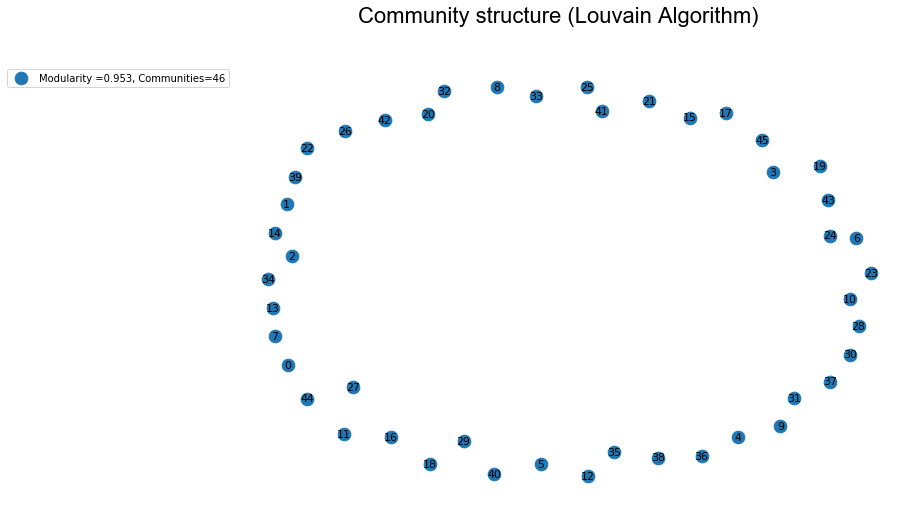

In [165]:
# Creating a new graph to represent the communities created by the Louvain algorithm
matplotlib.rcParams['figure.figsize']= [12, 8]
G_comm=nx.Graph()

# Populating the data from the node dictionary created earlier
G_comm.add_nodes_from(dict_nodes)

# Calculating modularity and the total number of communities
mod=community_louvain.modularity(partition,G)
print("Modularity: ", mod)
print("Total number of Communities=", len(G_comm.nodes()))

# Creating the Graph and also calculating Modularity
matplotlib.rcParams['figure.figsize']= [12, 8]
pos_louvain=nx.spring_layout(G_comm)
nx.draw_networkx(G_comm, pos_louvain, with_labels=True,node_size=160,font_size=11,label='Modularity =' + str(round(mod,3)) +
                    ', Communities=' + str(len(G_comm.nodes())))
plt.suptitle('Community structure (Louvain Algorithm)',fontsize=22,fontname='Arial')
plt.box(on=None)
plt.axis('off')
plt.legend(bbox_to_anchor=(0,1), loc='best', ncol=1)
plt.savefig('louvain.png',dpi=400, bbox_inches='tight')

In [166]:
# Viewing the list of communities
community_df

,Members
Community_Num,
0,P1 | P63 | P12 | P16 | P78 | P88 | P92 | P36 | P103 | P44 | P129
1,P2 | P64 | P83
2,P3 | P65 | P71
3,P4 | P66 | P85
4,P5 | P67
5,P6 | P35 | P98 | P118
6,P7 | P68 | P108
7,P8 | P69
8,P9 | P70


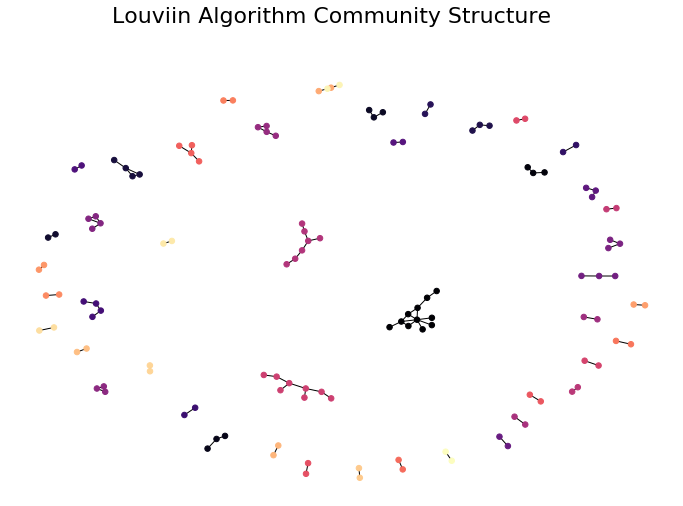

In [167]:
# Now we try to obtain the color coded graph for each community
nx.draw_networkx(G, pos, cmap=plt.get_cmap('magma'), node_color=values,node_size=30, with_labels=False)
plt.suptitle('Louviin Algorithm Community Structure',fontsize=22)
plt.box(on=None)
plt.axis('off')
plt.savefig('louvain_2.png',dpi=400, bbox_inches='tight')
plt.show()